# 지도 학습 예제 : 단순 선형 회귀

[3.74540119 9.50714306 7.31993942 5.98658484 1.5601864  1.5599452
 0.58083612 8.66176146 6.01115012 7.08072578 0.20584494 9.69909852
 8.32442641 2.12339111 1.81824967 1.8340451  3.04242243 5.24756432
 4.31945019 2.9122914  6.11852895 1.39493861 2.92144649 3.66361843
 4.56069984 7.85175961 1.99673782 5.14234438 5.92414569 0.46450413
 6.07544852 1.70524124 0.65051593 9.48885537 9.65632033 8.08397348
 3.04613769 0.97672114 6.84233027 4.40152494 1.22038235 4.9517691
 0.34388521 9.09320402 2.58779982 6.62522284 3.11711076 5.20068021
 5.46710279 1.84854456]
[ 49.91948441 135.77851424 102.68344299  82.49766893  14.92427408
  15.67933384   1.25190305 123.98354409  83.51087005  97.44784651
  -3.58824189 138.10139554 117.18947412  25.46254289  21.3047446
  21.4419566   37.79711892  71.40425237  58.12301623  37.65991616
  84.29875997  13.73842012  35.71536231  46.75806987  62.22302345
 112.13263424  22.8790572   71.13869866  82.22382135  -0.67755785
  84.49312339  20.11665512   2.72191291 136.897

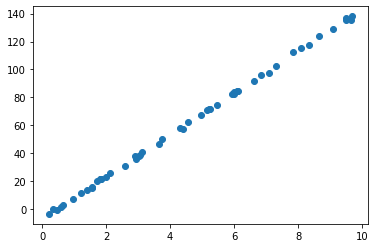

In [2]:
# import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42) # 시드값 줘서 난수발생시킴

# rand, randn 모두 np.random의 함수임. RandomState 때문에 아닌 줄.
# 리스트를 이런 방식으로 연산할 수 있다는 것을 인지해야 함
x = 10 * rng.rand(50)
y = 15 * x - 7 + rng.randn(50)
# print(x)
# print(y)

plt.scatter(x, y)

In [3]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# 데이터를 특징 매트릭스와 타겟 벡터로 정리해 넣기
Q 여기서 타겟변수 y는 이미 바른 형태임(a length- n_samples array) 
* 데이터 x를 [n_samples, n_features] 크기의 매트릭스 형태가 되도록 정리. 여기서는 특징이 1개라서 50 X 1 크기의 매트릭스가 됨. 예제처럼 feature가 하나라도 형식을 맞추기 위해 변환해야 된다

In [12]:
# Q np.newaxis

X = x[:, np.newaxis]
X.shape

model.fit(X, y) # 성능평가 모델과 똑같은 형식이 들어감(첫번째 인자는 (a,b) 두번째 인자는 (a, ))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
print("기울기(w1) : ", model.coef_)
print("y절편(w0) : ", model.intercept_)
print("첫번째 셀과 비교해보면 거의 흡사하게 나온 것을 볼 수 있음")

기울기(w1) :  [14.9776566]
y절편(w0) :  -6.903310725531135
첫번째 셀과 비교해보면 거의 흡사하게 나온 것을 볼 수 있음


# 알려지지 않은 데이터에 대한 라벨 예측하기

x 입력값 생성

In [19]:
import numpy as np
xfit = np.linspace(-1, 11) # -1부터 11까지 랜덤한
xfit

array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])

x 값들을 ...

In [9]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

## 결과 시각화

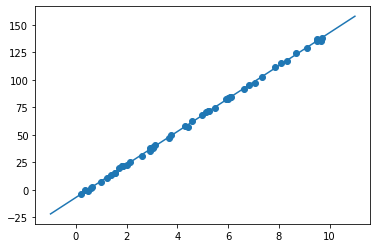

In [10]:
plt.scatter(x, y) # 원래의 학습 데이터를 그림
plt.plot(xfit, yfit) # 학습 데이터에 적합한 모델을 활용한 예측 결과를 그림

# 다중 회귀 실습

## RSS를 최소화해 OLS(Ordinary Least Squares) 추정 방식으로 구현
## LinearRegression을 이용한 보스턴 주택가격 예측 실습
### 각 feature에 대한 설명 찾아보기
### DataFrame으로 변환
### 헤드 부분 출력해서 살펴보기
### Null 값이 있는지 확인. 데이터 타입 확인

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

boston = load_boston()

# boston 데이터셋 DataFrame 변환
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

bostonDF['PRICE'] = boston.target
print("Boston 데이터셋 크기 : ", bostonDF.shape)
bostonDF.head()

Boston 데이터셋 크기 :  (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


- CRIM : 자치시(town) 별 1인당 범죄율
- ZN : 25,000 평방피트를 초과하는 거주지역의 비율
- INDUS : 비소매상업지역이 점유하고 있는 토지의 비율
- CHAS :찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0)
- NOX ; 10ppm당 농축 일산화질소
- RM : 주택 1가구당 평균 방의 개수
- AGE : 1940년 이전에 건축된 소유주택의 비율
- DIS : 5개의 보스턴 직업센터까지의 접근성 지수
- RAD : 방사형 도로까지의 접근성 지수
- TAX : 10,000 달러당 재산세율
- PTRATIO : 자치시(town)별 학생/교사 비율
- B : 자치시별 흑인의 비율
- LSTAT : 모집단의 하위계층의 비율(%)
- MEDV : 본인 소유의 주택가격(중앙값)

각 컬럼이 회귀 결과에 미치는 영향이 어느 정도인지 시각화해서 알아보기
- 각 피처에 대해 값이 증가할수록 PRICE 값이 어떻게 변하는지 확인
- Seaborn의 regplot() 함수는 X, Y의 산점도와 함께 회귀직선을 그려줌
- matplotlib의 subplots()으로 여러 개의 그래프를 한 번에 표현하도록 설정

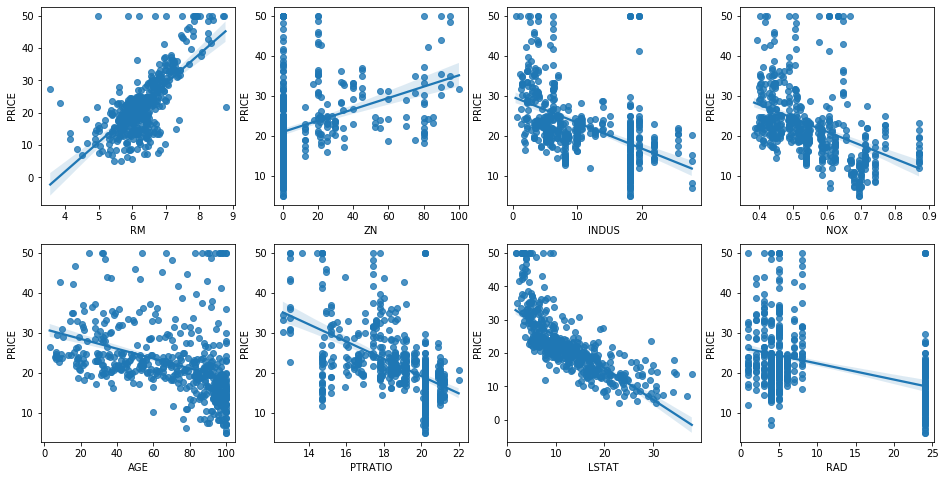

In [19]:
# 2개의 행과 4개의 열을 가진 subplots를 이용, axs는 4x2개의 ax를 가진다

# .subplots 는 피쳐별 비교를 위해 많이 사용된다.
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)

lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # Seaborn의 regplot()을 이용해 산점도와 선형 회귀 직선을 함께 표현한다
    # ax가 8개 그래프 하나 하나를 의미
    sns.regplot(x=feature, y = 'PRICE', data=bostonDF, ax=axs[row][col])

- RM(주택 1가구당 평균 방의 개수)과 LSTAT(모집단의 하위계층의 비율(%)) 두 features가 집값과 상관관계가 있음
- 머신러닝시 상관관계가 별로 없는 feature들을 아예 없애도 되고, 아니면 같이 돌려서 후반에 상관관계가 생겼는지 확인해도 됨. 이건 선택사항이라고 하심

### LinearRegression 클래스를 사용해서 보스턴 주택 가격의 회귀 모델을 만들기
- mse와 R2 메트릭을 활용
- rmse는 mse를 sqrt해서 구함

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis = 1, inplace = False) # axis = 1 을 해야 컬럼 방향을 제거한다.

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.3, random_state = 156)

# Linear Regression OLS로 학습
lr = LinearRegression()
lr.fit(X_train, y_train)

# 예측
y_preds = lr.predict(X_test)

# 평가 
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}' .format(mse, rmse))
print('Variance score : {0:.3f}' .format(r2_score(y_test, y_preds)))

MSE : 17.297, RMSE : 4.159
Variance score : 0.757


In [25]:
print("절편값 : %s" % lr.intercept_)
print("회귀계수값 : %s" % np.round(lr.coef_, 1))

절편값 : 40.995595172164315
회귀계수값 : [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [26]:
# 희귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. Index가 컬럼명이라는 것을 유의
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

- 그래프보다 이렇게 실제 상관계수 값을 보는 것이 더 신뢰할만하다.
- RM이ㅣ 양수 값으로 회귀 계수가 가자아 크고, NOX의 회귀 계수는 -값이 너무 크다.

## 5개의 폴드 세트를 통한 교차 검증으로 MSE와 RMSE 측정하기
- 사이킷런의 지표평가 기준은 높은 지표값일수록 좋은 모델이라 MSE값에 -1을 곱해서 반환하므로 반환 값에 -1을 다시 곱해야 원래의 값이 됨
- 여기에 sqrt를 해서 RMSE를 구할 수 있음

In [27]:
from sklearn.model_selection import cross_val_score
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis = 1, inplace = False)
lr = LinearRegression()

# cross_val_score()로 5 Fold 셋으로 MSE를 구한 뒤 이를 기반으로 다시 RMSE 구한다
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring = "neg_mean_squared_error", cv = 5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring = "neg_mean_squared_error")로 반환된 값은 모두 음수
print("5 folds의 개별 Negative MSE scores : %s " % np.round(neg_mse_scores, 2))
print("5 folds의 개별 RMSE scores : %s " % np.round(rmse_scores, 2))
print("5 folds의 평균 RMSE : {0: .3f} " .format(avg_rmse))

5 folds의 개별 Negative MSE scores : [-12.46 -26.05 -33.07 -80.76 -33.31] 
5 folds의 개별 RMSE scores : [3.53 5.1  5.75 8.99 5.77] 
5 folds의 평균 RMSE :  5.829 
